### importing all liabrarys

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline  ## %matplotlib inline is used to show diagram within box without using plot.show()

### importing train data set

In [5]:
train_df=pd.read_excel('Data_Train.xlsx')

In [6]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### importing test data set

In [8]:
test_df=pd.read_excel('Test_set.xlsx')

In [9]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


### adding test + train datasets

In [10]:
final_df=train_df.append(test_df)
final_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [11]:
final_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [12]:
## feature engg on all fields


In [13]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [14]:
# createing three seperate columns for year, day, month 

In [15]:
final_df['Date_of_Journey'].str.split('/')

0       [24, 03, 2019]
1        [1, 05, 2019]
2        [9, 06, 2019]
3       [12, 05, 2019]
4       [01, 03, 2019]
             ...      
2666     [6, 06, 2019]
2667    [27, 03, 2019]
2668     [6, 03, 2019]
2669     [6, 03, 2019]
2670    [15, 06, 2019]
Name: Date_of_Journey, Length: 13354, dtype: object

In [16]:
final_df['Date']=final_df['Date_of_Journey'].str.split('/').str[0]
final_df['Month']=final_df['Date_of_Journey'].str.split('/').str[1]
final_df['Year']=final_df['Date_of_Journey'].str.split('/').str[2]

In [17]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  object 
 12  Month            13354 non-null  object 
 13  Year             13354 non-null  object 
dtypes: float64(1), object(13)
memory usage: 1.5+ MB


In [ ]:
# converting date, year, month columns dtype object into int

In [18]:
final_df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019


In [19]:
final_df['Date']=final_df['Date'].astype(int)
final_df['Month']=final_df['Month'].astype(int)
final_df['Year']=final_df['Year'].astype(int)

In [20]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  int32  
 12  Month            13354 non-null  int32  
 13  Year             13354 non-null  int32  
dtypes: float64(1), int32(3), object(10)
memory usage: 1.4+ MB


In [ ]:
# droping date of journey column

In [21]:
final_df.drop('Date_of_Journey',axis=1,inplace=True)

In [22]:
final_df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019


In [ ]:
# converting arrival time column into 2 sep. hour and min columns

In [23]:
final_df['Arrival_Time']

0       01:10 22 Mar
1              13:15
2       04:25 10 Jun
3              23:30
4              21:35
            ...     
2666    20:25 07 Jun
2667           16:55
2668    04:25 07 Mar
2669           19:15
2670           19:15
Name: Arrival_Time, Length: 13354, dtype: object

In [24]:
final_df['Arrival_Time']=final_df['Arrival_Time'].str.split(' ').str[0]

In [25]:
final_df['Arrival_hour']=final_df['Arrival_Time'].str.split(':').str[0]
final_df['Arrival_min']=final_df['Arrival_Time'].str.split(':').str[1]

In [26]:
final_df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15


In [27]:
final_df['Arrival_hour']=final_df['Arrival_Time'].str.split(':').str[0].astype(int)
final_df['Arrival_min']=final_df['Arrival_Time'].str.split(':').str[1].astype(int)

In [28]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  Date             13354 non-null  int32  
 11  Month            13354 non-null  int32  
 12  Year             13354 non-null  int32  
 13  Arrival_hour     13354 non-null  int32  
 14  Arrival_min      13354 non-null  int32  
dtypes: float64(1), int32(5), object(9)
memory usage: 1.4+ MB


In [29]:
final_df.drop('Arrival_Time',axis=1,inplace=True)

In [30]:
final_df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10


In [ ]:
# converting dep_time column into 2 sep. hour and min columns

In [31]:
final_df['Dep_Time']

0       22:20
1       05:50
2       09:25
3       18:05
4       16:50
        ...  
2666    20:30
2667    14:20
2668    21:50
2669    04:00
2670    04:55
Name: Dep_Time, Length: 13354, dtype: object

In [32]:
final_df['Dep_hour']=final_df['Dep_Time'].str.split(':').str[0].astype(int)
final_df['Dep_min']=final_df['Dep_Time'].str.split(':').str[1].astype(int)

In [33]:
final_df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20


In [34]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Duration         13354 non-null  object 
 6   Total_Stops      13353 non-null  object 
 7   Additional_Info  13354 non-null  object 
 8   Price            10683 non-null  float64
 9   Date             13354 non-null  int32  
 10  Month            13354 non-null  int32  
 11  Year             13354 non-null  int32  
 12  Arrival_hour     13354 non-null  int32  
 13  Arrival_min      13354 non-null  int32  
 14  Dep_hour         13354 non-null  int32  
 15  Dep_min          13354 non-null  int32  
dtypes: float64(1), int32(7), object(8)
memory usage: 1.4+ MB


In [35]:
final_df.drop('Dep_Time',axis=1,inplace=True)

In [36]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Duration         13354 non-null  object 
 5   Total_Stops      13353 non-null  object 
 6   Additional_Info  13354 non-null  object 
 7   Price            10683 non-null  float64
 8   Date             13354 non-null  int32  
 9   Month            13354 non-null  int32  
 10  Year             13354 non-null  int32  
 11  Arrival_hour     13354 non-null  int32  
 12  Arrival_min      13354 non-null  int32  
 13  Dep_hour         13354 non-null  int32  
 14  Dep_min          13354 non-null  int32  
dtypes: float64(1), int32(7), object(7)
memory usage: 1.3+ MB


In [37]:
final_df['Route']

0                   BLR → DEL
1       CCU → IXR → BBI → BLR
2       DEL → LKO → BOM → COK
3             CCU → NAG → BLR
4             BLR → NAG → DEL
                ...          
2666          CCU → DEL → BLR
2667                CCU → BLR
2668          DEL → BOM → COK
2669          DEL → BOM → COK
2670          DEL → BOM → COK
Name: Route, Length: 13354, dtype: object

In [38]:
final_df['Total_Stops']

0       non-stop
1        2 stops
2        2 stops
3         1 stop
4         1 stop
          ...   
2666      1 stop
2667    non-stop
2668      1 stop
2669      1 stop
2670      1 stop
Name: Total_Stops, Length: 13354, dtype: object

In [39]:
final_df1=final_df.copy()  # copy the dataframe

In [40]:
final_df=final_df1.copy()

In [41]:
final_df1.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35,16,50


In [ ]:
# handeling categorical column total_stops

In [42]:
final_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [43]:
final_df['Total_Stops']=final_df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,'NaN':1})

In [44]:
final_df[final_df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480.0,6,5,2019,9,25,9,45


In [45]:
final_df.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 1
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
Date                  0
Month                 0
Year                  0
Arrival_hour          0
Arrival_min           0
Dep_hour              0
Dep_min               0
dtype: int64

In [46]:
final_df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,23h 55m,1.0,No info,NaN,6,6,2019,20,25,20,30
2667,IndiGo,Kolkata,Banglore,CCU → BLR,2h 35m,0.0,No info,NaN,27,3,2019,16,55,14,20
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,6h 35m,1.0,No info,NaN,6,3,2019,4,25,21,50
2669,Air India,Delhi,Cochin,DEL → BOM → COK,15h 15m,1.0,No info,NaN,6,3,2019,19,15,4,0


In [ ]:
# from total_stops, source , and destination also we can find route so droping column route

In [47]:
final_df.drop('Route',axis=1,inplace=True)

In [48]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Duration         13354 non-null  object 
 4   Total_Stops      13353 non-null  float64
 5   Additional_Info  13354 non-null  object 
 6   Price            10683 non-null  float64
 7   Date             13354 non-null  int32  
 8   Month            13354 non-null  int32  
 9   Year             13354 non-null  int32  
 10  Arrival_hour     13354 non-null  int32  
 11  Arrival_min      13354 non-null  int32  
 12  Dep_hour         13354 non-null  int32  
 13  Dep_min          13354 non-null  int32  
dtypes: float64(2), int32(7), object(5)
memory usage: 1.2+ MB


In [ ]:
# handeling duration column

In [49]:
final_df['Duration']

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
         ...   
2666    23h 55m
2667     2h 35m
2668     6h 35m
2669    15h 15m
2670    14h 20m
Name: Duration, Length: 13354, dtype: object

In [50]:
##final_df['Duration'].apply(lambda x:x.split('h')[0] if 'h'in x[:] else 0)

In [51]:
## my code 
##final_df['Duration'].apply(lambda x:x.split('h')[0] if 'h'in x[:] else 0).unique()

In [52]:
##final_df['Duration'].apply(lambda x:x[::-1].split('m')[1][:3] if 'm'in x else 0)

In [53]:
##final_df['Duration'].apply(lambda x:x[::-1].split('m')[1][:3] if 'm'in x else 0).unique()

In [54]:
##a=final_df['Duration'].apply(lambda x:x.split('h')[0] if 'h'in x else 0)
##b=final_df['Duration'].apply(lambda x:x[::-1].split('m')[0] if 'm'in x else 0)

In [ ]:
# converting duration column into total dutation column in which converting all time into minutes only.

In [55]:
final_df['Duration_hour']=final_df['Duration'].str.split(' ').str[0].str.split('h').str[0]

In [56]:
final_df['Duration_hour']

0        2
1        7
2       19
3        5
4        4
        ..
2666    23
2667     2
2668     6
2669    15
2670    14
Name: Duration_hour, Length: 13354, dtype: object

In [57]:
final_df[final_df['Duration_hour']=='5m']

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour
6474,Air India,Mumbai,Hyderabad,5m,2.0,No info,17327.0,6,3,2019,16,55,16,50,5m
2660,Air India,Mumbai,Hyderabad,5m,2.0,No info,NaN,12,3,2019,16,55,16,50,5m


In [58]:
final_df.drop(6474,axis=0,inplace=True)   # droping 2 rows
final_df.drop(2660,axis=0,inplace=True)

In [59]:
final_df['Duration_hour'].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '41', '40'], dtype=object)

In [60]:
final_df['Duration_hour']=final_df['Duration_hour'].astype(int)

In [61]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13351 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13351 non-null  object 
 1   Source           13351 non-null  object 
 2   Destination      13351 non-null  object 
 3   Duration         13351 non-null  object 
 4   Total_Stops      13350 non-null  float64
 5   Additional_Info  13351 non-null  object 
 6   Price            10681 non-null  float64
 7   Date             13351 non-null  int32  
 8   Month            13351 non-null  int32  
 9   Year             13351 non-null  int32  
 10  Arrival_hour     13351 non-null  int32  
 11  Arrival_min      13351 non-null  int32  
 12  Dep_hour         13351 non-null  int32  
 13  Dep_min          13351 non-null  int32  
 14  Duration_hour    13351 non-null  int32  
dtypes: float64(2), int32(8), object(5)
memory usage: 1.2+ MB


In [62]:
final_df['Duration']

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
         ...   
2666    23h 55m
2667     2h 35m
2668     6h 35m
2669    15h 15m
2670    14h 20m
Name: Duration, Length: 13351, dtype: object

In [63]:
final_df['Duration_min']=final_df['Duration'].str.split(' ').str[1].str.split('m').str[0].fillna(0)

In [64]:
final_df['Duration_min'].unique()

array(['50', '25', 0, '45', '30', '5', '15', '35', '10', '20', '55', '40'],
      dtype=object)

In [65]:
final_df['Duration_min']=final_df['Duration_min'].astype(int)

In [66]:
final_df[final_df['Duration_min'].isnull()]

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour,Duration_min


In [67]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13351 entries, 0 to 2670
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13351 non-null  object 
 1   Source           13351 non-null  object 
 2   Destination      13351 non-null  object 
 3   Duration         13351 non-null  object 
 4   Total_Stops      13350 non-null  float64
 5   Additional_Info  13351 non-null  object 
 6   Price            10681 non-null  float64
 7   Date             13351 non-null  int32  
 8   Month            13351 non-null  int32  
 9   Year             13351 non-null  int32  
 10  Arrival_hour     13351 non-null  int32  
 11  Arrival_min      13351 non-null  int32  
 12  Dep_hour         13351 non-null  int32  
 13  Dep_min          13351 non-null  int32  
 14  Duration_hour    13351 non-null  int32  
 15  Duration_min     13351 non-null  int32  
dtypes: float64(2), int32(9), object(5)
memory usage: 1.3+ MB


In [68]:
a=final_df['Duration_hour']*60

In [69]:
final_df['Total_duration']=(final_df['Duration_hour']*60)+(final_df['Duration_min'])

In [70]:
final_df['Total_duration']

0        170
1        445
2       1140
3        325
4        285
        ... 
2666    1435
2667     155
2668     395
2669     915
2670     860
Name: Total_duration, Length: 13351, dtype: int32

In [71]:
final_df['Total_duration'].isnull().sum()

0

In [72]:
final_df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour,Duration_min,Total_duration
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,2,50,170
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50,7,25,445
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25,19,0,1140
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5,5,25,325
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50,4,45,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,23h 55m,1.0,No info,NaN,6,6,2019,20,25,20,30,23,55,1435
2667,IndiGo,Kolkata,Banglore,2h 35m,0.0,No info,NaN,27,3,2019,16,55,14,20,2,35,155
2668,Jet Airways,Delhi,Cochin,6h 35m,1.0,No info,NaN,6,3,2019,4,25,21,50,6,35,395
2669,Air India,Delhi,Cochin,15h 15m,1.0,No info,NaN,6,3,2019,19,15,4,0,15,15,915


In [ ]:
# now droping duration column

In [73]:
final_df.drop('Duration',axis=1,inplace=True)

In [74]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13351 entries, 0 to 2670
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13351 non-null  object 
 1   Source           13351 non-null  object 
 2   Destination      13351 non-null  object 
 3   Total_Stops      13350 non-null  float64
 4   Additional_Info  13351 non-null  object 
 5   Price            10681 non-null  float64
 6   Date             13351 non-null  int32  
 7   Month            13351 non-null  int32  
 8   Year             13351 non-null  int32  
 9   Arrival_hour     13351 non-null  int32  
 10  Arrival_min      13351 non-null  int32  
 11  Dep_hour         13351 non-null  int32  
 12  Dep_min          13351 non-null  int32  
 13  Duration_hour    13351 non-null  int32  
 14  Duration_min     13351 non-null  int32  
 15  Total_duration   13351 non-null  int32  
dtypes: float64(2), int32(10), object(4)
memory usage: 1.2+ MB


In [75]:
final_df.head(1)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour,Duration_min,Total_duration
0,IndiGo,Banglore,New Delhi,0.0,No info,3897.0,24,3,2019,1,10,22,20,2,50,170


In [76]:
final_df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [77]:
##do label encoding for categorical fields

In [81]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [82]:
final_df['Airline']=labelencoder.fit_transform(final_df['Airline'])
final_df['Source']=labelencoder.fit_transform(final_df['Source'])
final_df['Destination']=labelencoder.fit_transform(final_df['Destination'])
final_df['Additional_Info']=labelencoder.fit_transform(final_df['Additional_Info'])

In [83]:
final_df.shape

(13351, 16)

In [84]:
final_df.head(3)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour,Duration_min,Total_duration
0,3,0,5,0.0,8,3897.0,24,3,2019,1,10,22,20,2,50,170
1,1,3,0,2.0,8,7662.0,1,5,2019,13,15,5,50,7,25,445
2,4,2,1,2.0,8,13882.0,9,6,2019,4,25,9,25,19,0,1140


In [ ]:
# get_dummies


In [145]:
df1=pd.get_dummies(train_df,columns=['Airline','Source','Destination','Additional_Info'],drop_first=True)

In [146]:
df1

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,...,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,9/06/2019,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,12/05/2019,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,01/03/2019,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302,0,0,1,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,9/04/2019,CCU → BLR,19:55,22:25,2h 30m,non-stop,4107,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10679,27/04/2019,CCU → BLR,20:45,23:20,2h 35m,non-stop,4145,1,0,0,...,0,0,0,0,0,0,0,0,1,0
10680,27/04/2019,BLR → DEL,08:20,11:20,3h,non-stop,7229,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10681,01/03/2019,BLR → DEL,11:30,14:10,2h 40m,non-stop,12648,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [85]:
final_df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour,Duration_min,Total_duration
0,3,0,5,0.0,8,3897.0,24,3,2019,1,10,22,20,2,50,170
1,1,3,0,2.0,8,7662.0,1,5,2019,13,15,5,50,7,25,445
2,4,2,1,2.0,8,13882.0,9,6,2019,4,25,9,25,19,0,1140
3,3,3,0,1.0,8,6218.0,12,5,2019,23,30,18,5,5,25,325
4,3,0,5,1.0,8,13302.0,1,3,2019,21,35,16,50,4,45,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,1.0,8,NaN,6,6,2019,20,25,20,30,23,55,1435
2667,3,3,0,0.0,8,NaN,27,3,2019,16,55,14,20,2,35,155
2668,4,2,1,1.0,8,NaN,6,3,2019,4,25,21,50,6,35,395
2669,1,2,1,1.0,8,NaN,6,3,2019,19,15,4,0,15,15,915


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Month', ylabel='Price'>

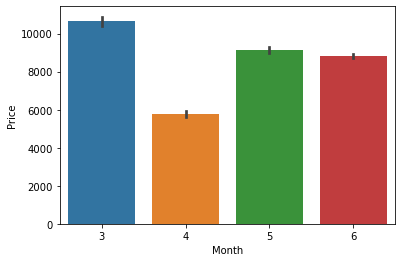

In [86]:
sns.barplot('Month','Price',data=final_df)

<AxesSubplot:xlabel='Total_duration', ylabel='Price'>

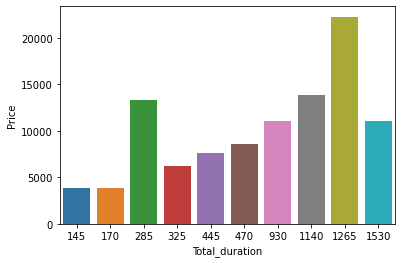

In [90]:
sns.barplot('Total_duration','Price',data=final_df.head(10))

<AxesSubplot:>

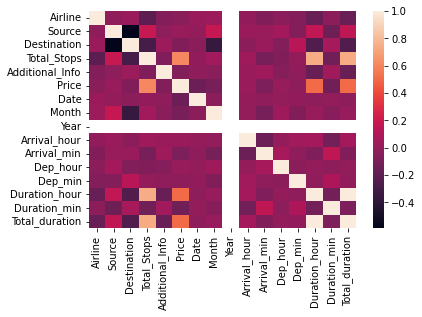

In [92]:
sns.heatmap(final_df.corr())

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

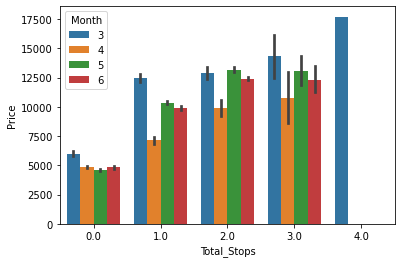

In [97]:
sns.barplot('Total_Stops','Price',data=final_df,hue='Month')

In [ ]:
###obeservation: in march almost all people trvelled with 4 stops. 

In [98]:
final_df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'Date', 'Month', 'Year', 'Arrival_hour', 'Arrival_min',
       'Dep_hour', 'Dep_min', 'Duration_hour', 'Duration_min',
       'Total_duration'],
      dtype='object')

<AxesSubplot:xlabel='Source', ylabel='Destination'>

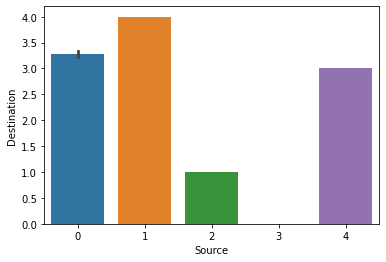

In [101]:
sns.barplot('Source','Destination',data=final_df)

<AxesSubplot:xlabel='Arrival_hour', ylabel='count'>

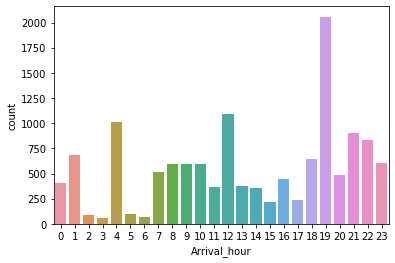

In [114]:
sns.countplot(x='Arrival_hour',data=final_df)

In [ ]:
# most of the people prefer to fly at arround 8 pm